In [84]:
# Install yfiance to pull info from finance.yahoo.com
!pip install yfinance

In [85]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import yfinance as yf               # Using yfinance instead of pandas_datareader
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Read Data
tickers = ['AAPL','AMZN','GOOG','META','MSFT','NVDA','TSLA']
# df = yf.download(tickers, start='2019-01-01', end='2024-07-03')
df = yf.download(tickers, start='2019-01-01')
df.head()

[*********************100%%**********************]  7 of 7 completed


Price       Adj Close                                                         \
Ticker           AAPL       AMZN       GOOG        META       MSFT      NVDA   
Date                                                                           
2019-01-02  37.793777  76.956497  52.233059  135.401749  95.673454  3.378612   
2019-01-03  34.029228  75.014000  50.745255  131.469833  92.153839  3.174486   
2019-01-04  35.481922  78.769501  53.474648  137.667099  96.439819  3.377868   
2019-01-07  35.402946  81.475502  53.358780  137.766891  96.562820  3.556695   
2019-01-08  36.077847  82.829002  53.752831  142.237717  97.262955  3.468149   

Price                      Close                        ...        Open  \
Ticker           TSLA       AAPL       AMZN       GOOG  ...        MSFT   
Date                                                    ...               
2019-01-02  20.674667  39.480000  76.956497  52.292500  ...   99.550003   
2019-01-03  20.024000  35.547501  75.014000  50.803001  ...  100.099998   
2019-01-04  21.179333  37.064999  78.769501  53.535500  ...   99.720001   
2019-01-07  22.330667  36.982498  81.475502  53.419498  ...  101.639999   
2019-01-08  22.356667  37.687500  82.829002  53.813999  ...  103.040001   

Price                              Volume                                 \
Ticker         NVDA       TSLA       AAPL       AMZN      GOOG      META   
Date                                                                       
2019-01-02  3.26600  20.406668  148158800  159662000  30652000  28146200   
2019-01-03  3.34475  20.466667  365248800  139512000  36822000  22717900   
2019-01-04  3.27350  20.400000  234428400  183652000  41878000  29002100   
2019-01-07  3.46250  21.448000  219111200  159864000  39638000  20089300   
2019-01-08  3.66725  22.797333  164101200  177628000  35298000  26263800   

Price                                       
Ticker          MSFT       NVDA       TSLA  
Date                                        
2019-01-02  35329300  508752000  174879000  
2019-01-03  42579100  705552000  104478000  
2019-01-04  44060600  585620000  110911500  
2019-01-07  35656100  709160000  113268000  
2019-01-08  31514400  786016000  105127500  

[5 rows x 42 columns]

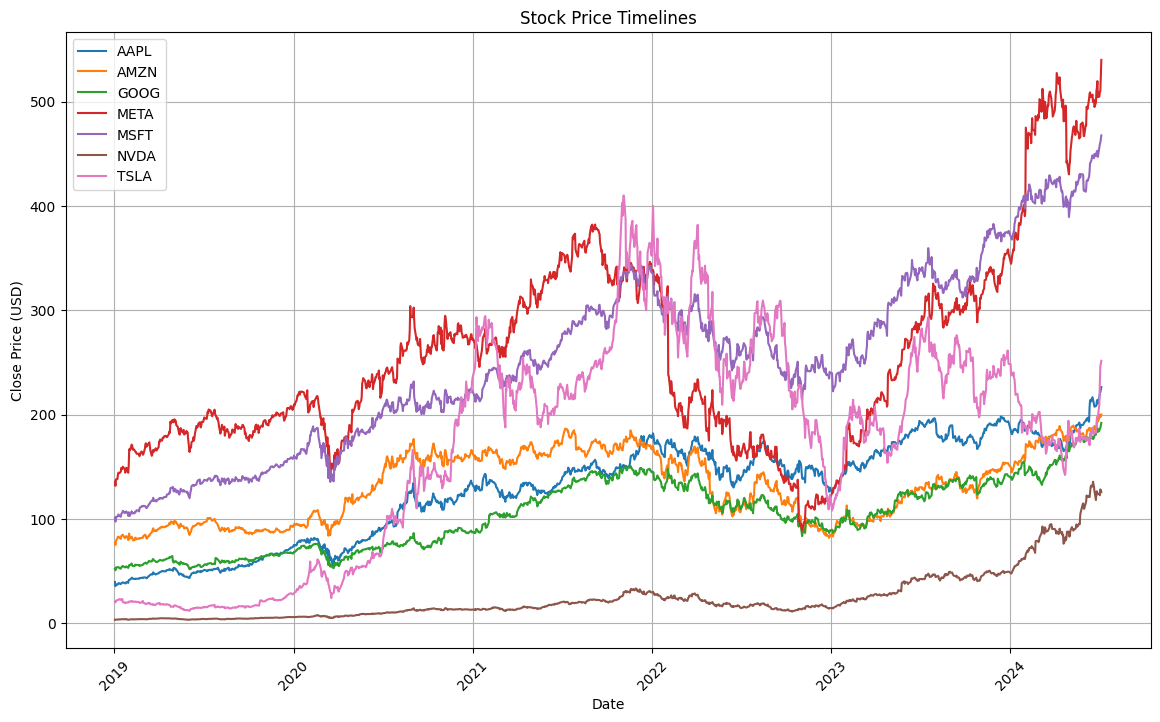

In [89]:
# Plot the stock price timelines
plt.figure(figsize=(14, 8))

# Plot each stock's closing price
for ticker in tickers:
    plt.plot(df['Close'][ticker], label=ticker)

# Customize the plot
plt.title('Stock Price Timelines')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

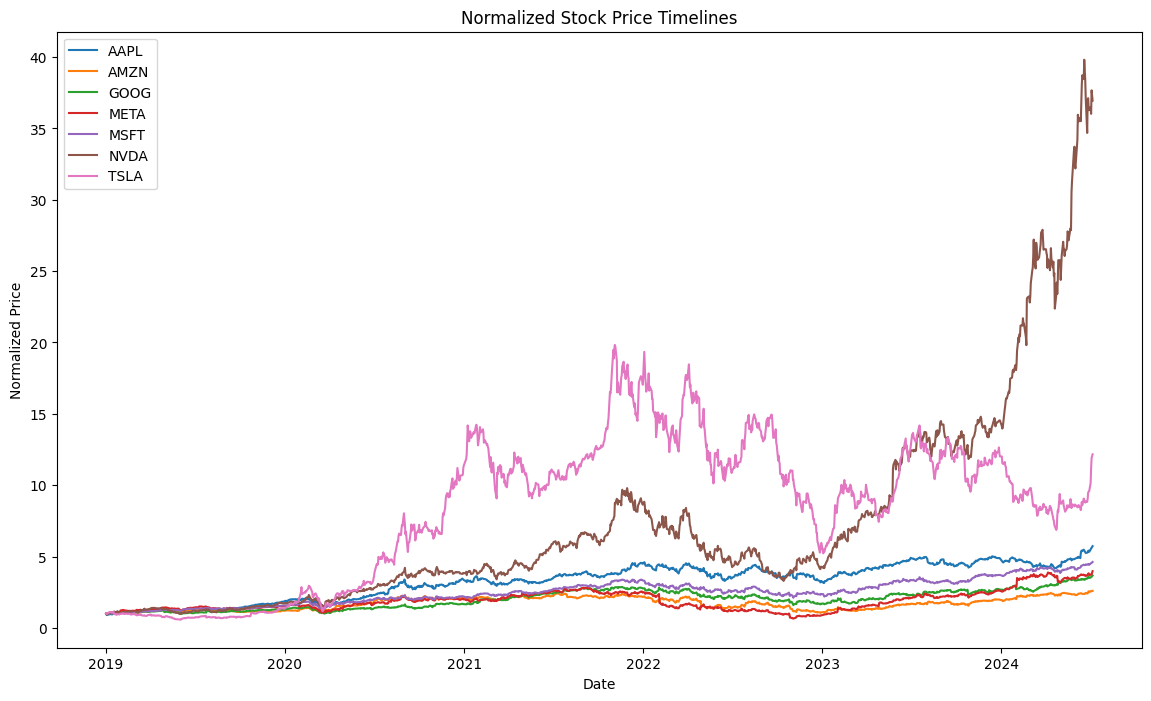

In [90]:
# Normalize stock for better comparison
data = df['Close']

# Normalize the stock prices
normalized_data = data / data.iloc[0]  # Divide by the first row to normalize

# Plot the normalized stock price timelines
plt.figure(figsize=(14, 8))

# Plot each stock's normalized closing price
for ticker in tickers:
    plt.plot(normalized_data.index, normalized_data[ticker], label=ticker)

# Customize the plot
plt.title('Normalized Stock Price Timelines')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()

In [91]:
# Closing price
df = df['Adj Close']
df.head()

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2019-01-02,37.793777,76.956497,52.233059,135.401749,95.673454,3.378612,20.674667
2019-01-03,34.029228,75.014000,50.745255,131.469833,92.153839,3.174486,20.024000
2019-01-04,35.481922,78.769501,53.474648,137.667099,96.439819,3.377868,21.179333
2019-01-07,35.402946,81.475502,53.358780,137.766891,96.562820,3.556695,22.330667
2019-01-08,36.077847,82.829002,53.752831,142.237717,97.262955,3.468149,22.356667


<Axes: xlabel='Ticker'>

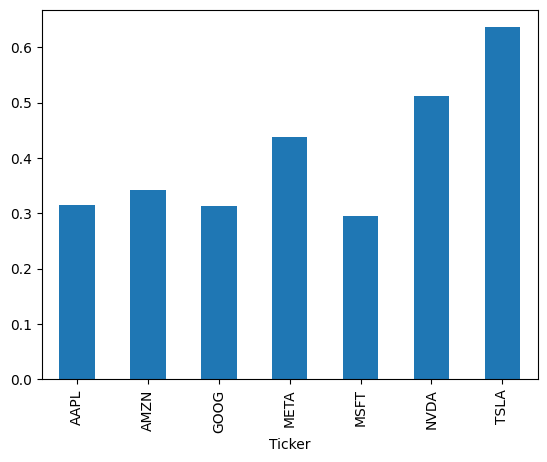

In [92]:
# Volatility of stocks in portfolio
df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [93]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,0.000397,0.000260,0.000257,0.000307,0.000277,0.000404,0.000391
AMZN,0.000260,0.000469,0.000281,0.000366,0.000277,0.000417,0.000367
GOOG,0.000257,0.000281,0.000393,0.000349,0.000275,0.000384,0.000307
META,0.000307,0.000366,0.000349,0.000766,0.000315,0.000477,0.000363
MSFT,0.000277,0.000277,0.000275,0.000315,0.000348,0.000418,0.000334
NVDA,0.000404,0.000417,0.000384,0.000477,0.000418,0.001053,0.000613
TSLA,0.000391,0.000367,0.000307,0.000363,0.000334,0.000613,0.001618


In [94]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,1.000000,0.602875,0.651989,0.556278,0.743949,0.624896,0.487525
AMZN,0.602875,1.000000,0.655089,0.611056,0.684478,0.593963,0.421305
GOOG,0.651989,0.655089,1.000000,0.636622,0.743897,0.597342,0.384908
META,0.556278,0.611056,0.636622,1.000000,0.610327,0.531216,0.325945
MSFT,0.743949,0.684478,0.743897,0.610327,1.000000,0.690806,0.444373
NVDA,0.624896,0.593963,0.597342,0.531216,0.690806,1.000000,0.469245
TSLA,0.487525,0.421305,0.384908,0.325945,0.444373,0.469245,1.000000


In [95]:
# Enter the current weigths in your own portfolio
w = {'AAPL': 0.1,'AMZN': 0.1,'GOOG': 0.1,'META': 0.1,'MSFT': 0.1,'NVDA': 0.2,'TSLA': 0.3}
current_portfolio_weights = w
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.000534038842243808

In [96]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Ticker
AAPL    0.314859
AMZN    0.283059
GOOG    0.305445
META    0.477957
MSFT    0.299940
NVDA    1.181304
TSLA    1.662211
dtype: float64

In [97]:
# Portfolio returns
w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3] # Don't forget to update the same weights as above
port_er = (w*ind_er).sum()
port_er

0.903050159597977

In [98]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
AAPL    0.314918
AMZN    0.342429
GOOG    0.313373
META    0.437653
MSFT    0.295112
NVDA    0.513124
TSLA    0.636080
dtype: float64

In [99]:
sd = np.sqrt(port_var) # Daily standard deviation
current_volatility = sd*np.sqrt(250) # Annual standard deviation = volatility
current_volatility

0.3653898063177899

In [100]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Ticker,,
AAPL,0.314859,0.314918
AMZN,0.283059,0.342429
GOOG,0.305445,0.313373
META,0.477957,0.437653
MSFT,0.299940,0.295112
NVDA,1.181304,0.513124
TSLA,1.662211,0.636080


In [101]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [102]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [103]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [104]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,GOOG weight,META weight,MSFT weight,NVDA weight,TSLA weight
0,0.790566,0.341542,0.102858,0.128329,0.189319,0.076008,0.090885,0.177559,0.235042
1,0.774555,0.339412,0.168736,0.133763,0.133145,0.031667,0.111208,0.220803,0.200678
2,0.473093,0.291252,0.216918,0.050081,0.228941,0.110048,0.268281,0.044432,0.081299
3,0.722656,0.340931,0.033571,0.056043,0.160724,0.296209,0.180083,0.005942,0.267427
4,0.841268,0.352006,0.083249,0.074049,0.119230,0.098109,0.190557,0.143707,0.291100


<Axes: xlabel='Volatility', ylabel='Returns'>

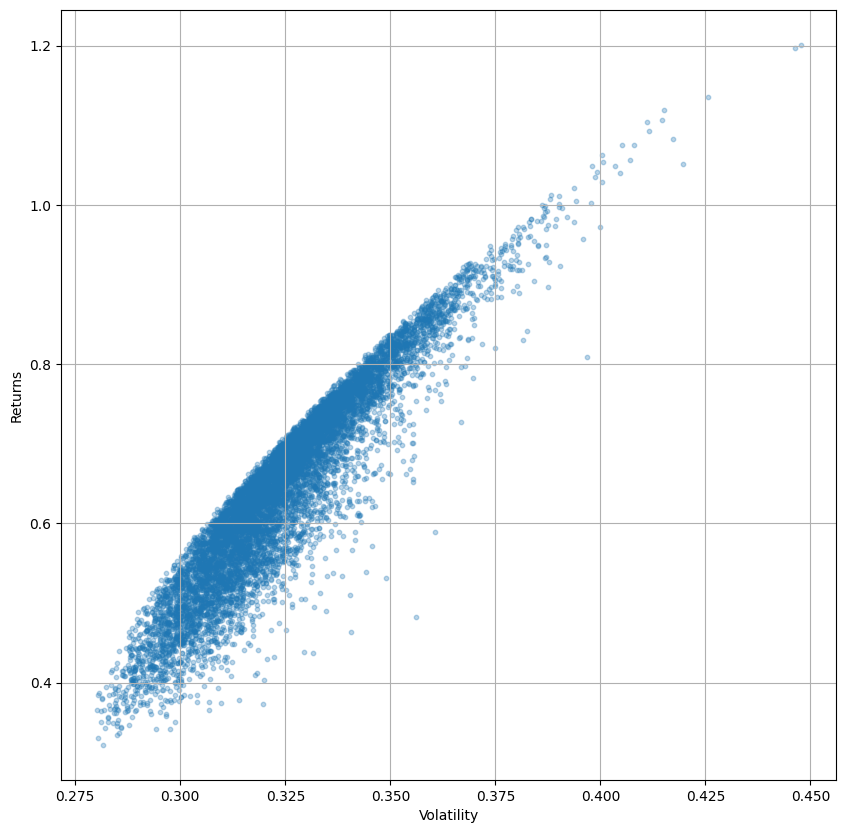

In [105]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [74]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns        0.332625
Volatility     0.278438
AAPL weight    0.326021
AMZN weight    0.103474
GOOG weight    0.190860
META weight    0.070398
MSFT weight    0.292468
NVDA weight    0.001224
TSLA weight    0.015556
Name: 6420, dtype: float64

The above shows the portfolio weights for minimum volatility with maximum profit. This point can be plotted on the efficient frontier graph as shown:

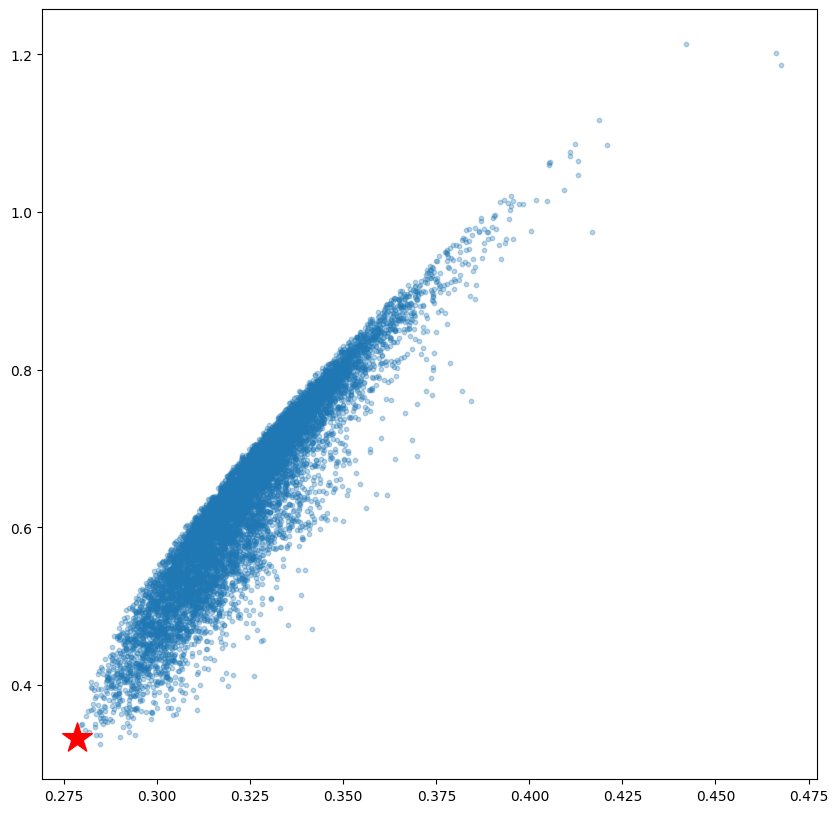

In [75]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

**Optimal Risky Portfolio**

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.  Let’s find out.

In [76]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        1.212820
Volatility     0.442008
AAPL weight    0.024779
AMZN weight    0.048894
GOOG weight    0.014072
META weight    0.062146
MSFT weight    0.020589
NVDA weight    0.445955
TSLA weight    0.383564
Name: 4313, dtype: float64

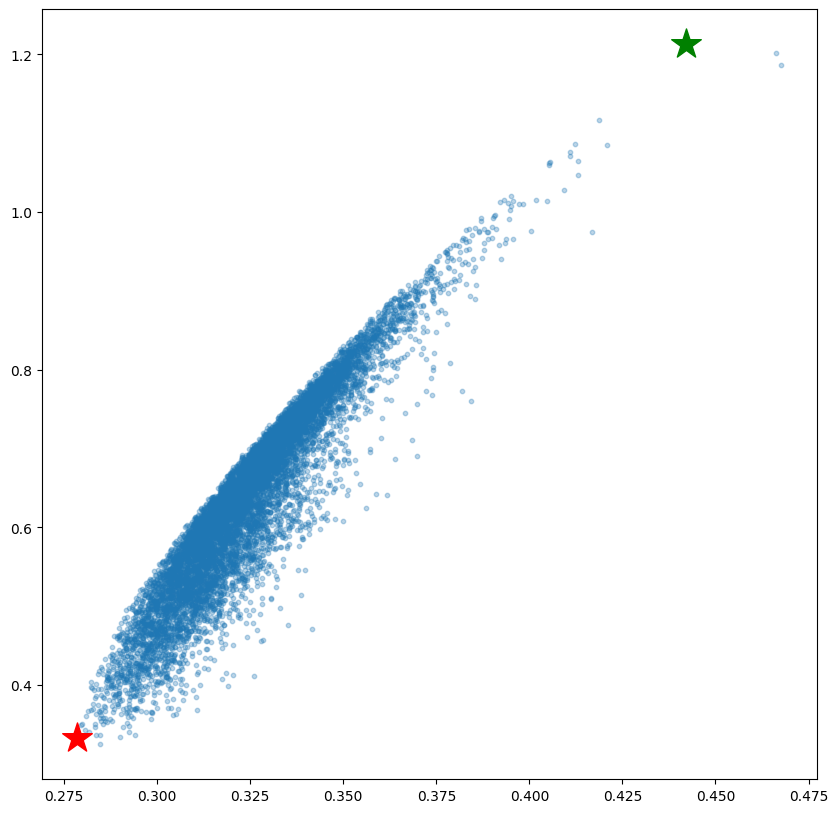

In [77]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)


Current Portfolio Variance:  0.3654326173076866
Current Portfolio Returns:  0.8920491739237579
Current Portfolio Weights:  {'AAPL': 0.1, 'AMZN': 0.1, 'GOOG': 0.1, 'META': 0.1, 'MSFT': 0.1, 'NVDA': 0.2, 'TSLA': 0.3}


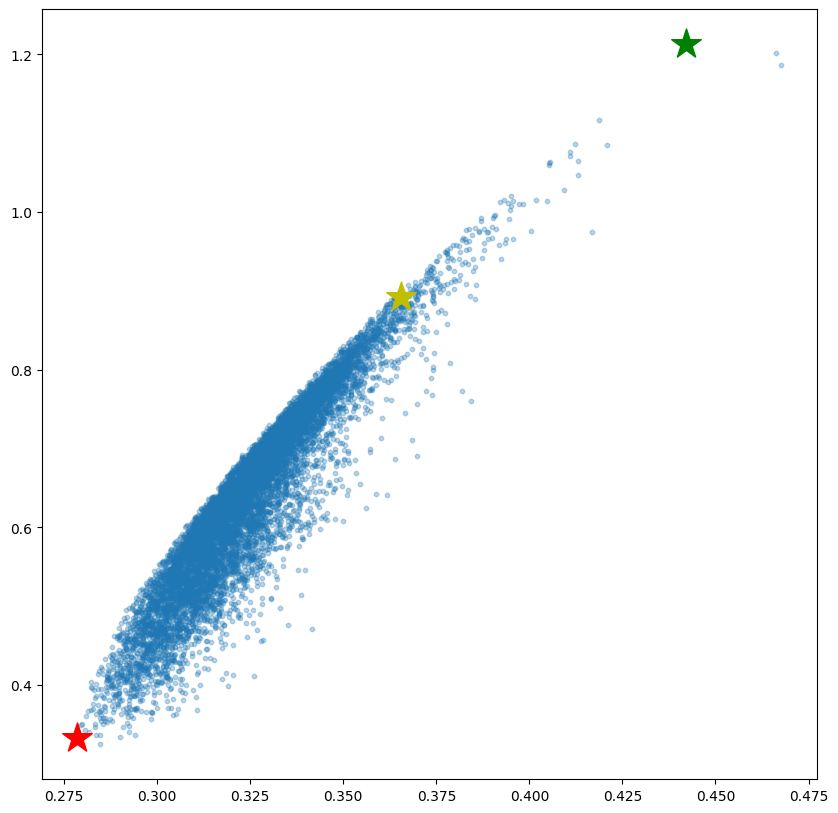

In [81]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## current state of portfolio
plt.scatter(current_volatility, port_er, color='y', marker='*', s=500)
print ("Current Portfolio Variance: ", current_volatility)
print ("Current Portfolio Returns: ", port_er)
print ("Current Portfolio Weights: ", current_portfolio_weights)